# Machine Learning Model Training: Logistic Regression

In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

pandas.options.display.max_columns = None
pandas.options.display.max_rows = None
seaborn.set(rc={'figure.figsize':(10,10)})

# data spans from ABA and NBA (1948 to current [June 2022])
nba_players = pandas.read_csv("NBA_players_clean.csv")

nba_players.head(10)

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,TRB,AST,FG%,FG3%,FT%,eFG%,PER,WS,All Star,All NBA,All ABA,All Rookie,All Defensive,BLK Champ,STL Champ,TRB Champ,AST Champ,Scoring Champ,Most Improved,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
0,Alaa Abdelnaby,1991,1995,5,F-C,6-10,6.833333,240.0,256,5.7,3.3,0.3,50.2,0.0,70.1,50.2,13.0,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Zaid Abdul-Aziz,1969,1978,10,F-C,6-9,6.750000,235.0,505,9.0,8.0,1.2,42.8,17.7,72.8,48.4,15.1,17.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kareem Abdul-Jabbar*,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,11.2,3.6,55.9,5.6,72.1,55.9,24.6,273.4,19,15,0,1,11,4,0,1,0,2,0,0,0,1,0,0,2,6,6,1,0
3,Mahmoud Abdul-Rauf,1991,2001,11,G,6-1,6.083333,162.0,586,14.6,1.9,3.5,44.2,35.4,90.5,47.2,15.4,25.2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Tariq Abdul-Wahad,1998,2003,6,F,6-6,6.500000,223.0,236,7.8,3.3,1.1,41.7,23.7,70.3,42.2,11.4,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Shareef Abdur-Rahim,1997,2008,12,F,6-9,6.750000,225.0,830,18.1,7.5,2.5,47.2,29.7,81.0,47.9,19.0,71.2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Tom Abernethy,1977,1981,5,F,6-7,6.583333,220.0,319,5.6,3.2,1.2,49.2,0.0,74.7,49.2,12.9,13.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Forest Able,1957,1957,1,G,6-3,6.250000,180.0,1,0.0,1.0,1.0,0.0,27.9,73.7,44.1,-41.5,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,John Abramovic,1947,1948,2,F,6-3,6.250000,195.0,56,9.5,3.0,0.7,23.7,23.4,68.6,45.3,10.9,-1.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Álex Abrines,2017,2019,3,G-F,6-6,6.500000,200.0,174,5.3,1.4,0.5,38.7,36.8,88.0,52.5,8.8,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
# Step 1: Seperate all the players who are already inducted into the hall

hall_of_famers = nba_players[nba_players["Player"].str.contains("\*")]

# Step 2: We need to have some sort of representation of induction status within its own column in the datset

inductees = []

for i in range(len(nba_players)):
    if '*' in nba_players.iloc[i]['Player']:
        inductees.append(1)
    else:
        inductees.append(0)
        
# Step 3: We need to add the newly created inductees list as a column to our dataframe

nba_players["HOF"] = inductees

# Step 4: I want to verify that all of the hall of famers have appropriate representation in the new HOF column

hall_of_famers = nba_players[nba_players["Player"].str.contains("\*")]

# Step 5: Use scikit-learn imports to create your model, first we want to omit any columns that aren't necessary for our predictions


features = list(nba_players.columns)[8:-1]
x = nba_players[features]
y = nba_players['HOF']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

logreg = LogisticRegression()

# fit model
logreg.fit(x_train, y_train)

# Step 6: Use your model's prediction method

y_pred = logreg.predict(x_test)

# Step 7: Test and compare your model's predictions against the actual data

acc = accuracy_score(y_test, y_pred)

/Users/henrybowe/python-virtual-environments/pyfound/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# create function to use predictions model on any active player

def hall_of_fame_probability(player_name):
    
    player = nba_players[nba_players["Player"].str.contains(player_name)]
    
    if player.HOF.values[0] == 1:
        
        print("{} has already been inducted in the hall of fame!".format(player_name))
        
    else:
        
        probability = logreg.predict_proba(player[features])[0][1]

        print("{}'s chances of getting into the Hall of Fame: {:.3f}%".format(player_name, probability*100))
        
# using the function to predict active players chances of getting in the hall of fame

hall_of_fame_probability("LeBron James")

LeBron James's chances of getting into the Hall of Fame: 99.935%


# What factors from a player's career influence their induction into the Hall of Fame the most?
* examine hall of famers stats to see which may influence induction the most

Feature: G, Score: 0.00208905969668769
Feature: PTS, Score: 0.10565772758209654
Feature: TRB, Score: 0.2018040714463626
Feature: AST, Score: 0.2725302195508909
Feature: FG%, Score: -0.051320439026513495
Feature: FG3%, Score: -0.02778648966177877
Feature: FT%, Score: -0.03787043391920863
Feature: eFG%, Score: -0.06307990762565077
Feature: PER, Score: 0.03860367086552342
Feature: WS, Score: -0.01411846851079596
Feature: All Star, Score: 0.5671800700445554
Feature: All NBA, Score: -0.11620247455109411
Feature: All ABA, Score: 0.09536508235039529
Feature: All Rookie, Score: -0.058878264344515784
Feature: All Defensive, Score: 0.10490895059859276
Feature: BLK Champ, Score: 0.010083490860512134
Feature: STL Champ, Score: -0.08415246559677286
Feature: TRB Champ, Score: 0.06125320672662323
Feature: AST Champ, Score: 0.0366264063241002
Feature: Scoring Champ, Score: -0.03091069161430276
Feature: Most Improved, Score: -0.024357161738106967
Feature: Sixth Man, Score: 0.015081025190620026
Feature:

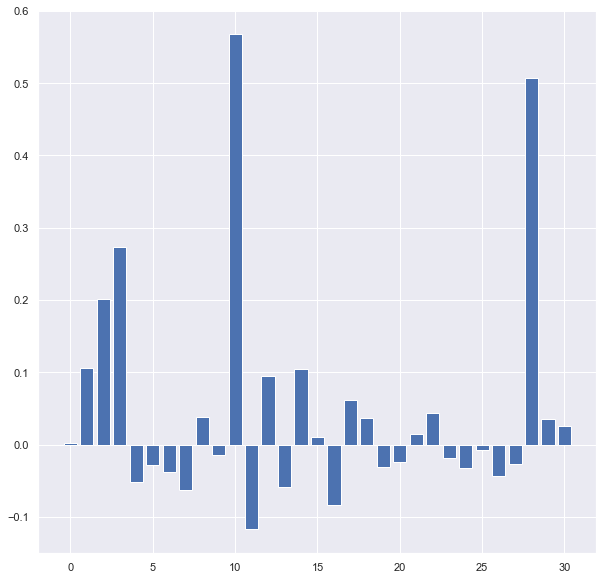

In [4]:
# get the coeffiencts of each feature in the dataset
feature_importance = logreg.coef_[0]

# summarize feature importance
for i,v in enumerate(feature_importance):
    print('Feature: {}, Score: {}'.format(features[i],v))

# plot feature importance
plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.show()